In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

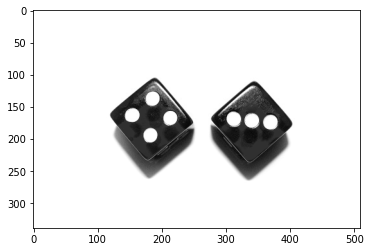

In [2]:
img = cv2.imread("1.jpeg")
gray_img = cv2.cvtColor(img , cv2.COLOR_BGR2GRAY)
plt.imshow(gray_img, cmap = "gray")

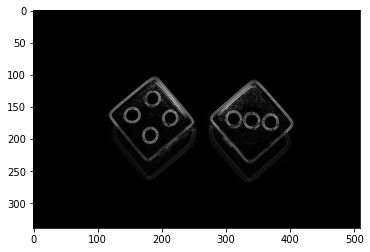

In [3]:
gray_img = cv2.GaussianBlur(gray_img, (3, 3), 0)
lap = cv2.Laplacian(gray_img ,cv2.CV_16S)
lap = np.uint8(np.absolute(lap))
plt.imshow(lap, cmap = "gray")

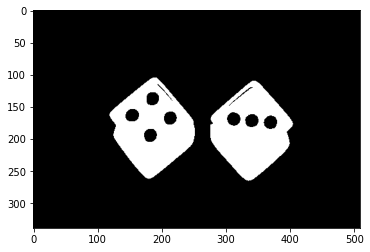

In [4]:
_ ,gray_img = cv2.threshold(gray_img,230,255,cv2.THRESH_BINARY)
gray_img = 255 - gray_img

plt.imshow(gray_img ,cmap="gray")

In [5]:
contours , _ = cv2.findContours(gray_img, cv2.RETR_LIST, cv2.CHAIN_APPROX_NONE)

In [6]:
_ , th1 = cv2.threshold(lap , 22 , 255 , cv2.THRESH_BINARY)

th1 = cv2.medianBlur(th1, 5)

circles = cv2.HoughCircles(th1, cv2.HOUGH_GRADIENT, 1,10,param1=100, param2=30,minRadius=0, maxRadius=0)
circles = np.uint16(np.around(circles))

for i in circles[0, :]:
    center = (i[0], i[1])
    # circle center
    cv2.circle(img, center,1, (0, 255,0), 3)
    # circle outline
    radius = i[2]
    cv2.circle(img, center, radius, (0, 255,0), 3)

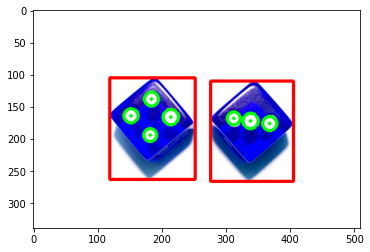

In [7]:
dice_list = []

for c in contours:
    if len(c) > 250:
        x, y, w, h = cv2.boundingRect(c)
        dice = th1[y:y+h,x:x+w]
        dice_list.append(dice)
        cv2.rectangle(img, (x,y) , (x+w,y+h), (255,0,0), 4) 
        
plt.imshow(img, cmap = "gray")

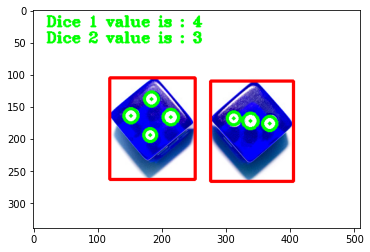

In [8]:
dice1_dots = cv2.HoughCircles(dice_list[1], cv2.HOUGH_GRADIENT,1,40,param1=100, param2=30,minRadius=0, maxRadius=0)
dice1_dots = np.uint16(np.around(dice1_dots))
cv2.putText(img, text= f'Dice 1 value is : {len(dice1_dots[0, :])}', org=(20, 25), fontFace=cv2.FONT_HERSHEY_TRIPLEX, fontScale=0.75, color=(0, 255, 0),thickness=2)


dice2_dots = cv2.HoughCircles(dice_list[0], cv2.HOUGH_GRADIENT,1,10,param1=100, param2=30,minRadius=0, maxRadius=0)
dice2_dots = np.uint16(np.around(dice2_dots))
cv2.putText(img, text= f'Dice 2 value is : {len(dice2_dots[0, :])}', org=(20, 50), fontFace=cv2.FONT_HERSHEY_TRIPLEX, fontScale=0.75, color=(0, 255, 0),thickness=2)

    
plt.imshow(img, cmap = "gray")